<a href="https://colab.research.google.com/github/emon273273/Thesis/blob/Main/ml/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'height-weight:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4950968%2F8336416%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240506%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240506T145111Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D50c7b7f86bcc725c49f54bd40c29b2beeaabaeb24d1d3cab44dbf0323b1c8b0212dade3077c9620e19ce6307a525b0fd158fd5a8753f1bc249e3fceb02a9fe9e2ff312bb825e69322b4700b06252a4657b4356c4fa7af20e247979916289f9e4be0e0c6d834cd20a00407e9223ce79cca7b9447f40b7cfcec3acbea69f5fce8844e450e28c0a0f10ec648dca66156b33ea62bee202859c81b82ec0b760559ff51d4a4b9ebf29981e04c9c9bab36244f71b062f800d7c5a99711b031dbd679d314ff2e03d4e6f95439a320e481f520e3b259ac6c6773462f12500b1d03ad800859ba227bb37d6d740a72d39a1421050a04d505c6774cd6a377cd3c0bab51f9d04'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 285 bytes downloaded
Downloaded and uncompressed: height-weight
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/height-weight/height-weight.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [ ]:
df=pd.read_csv("/kaggle/input/height-weight/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


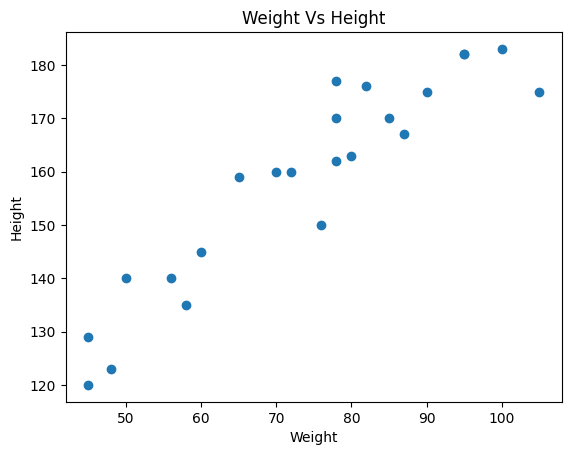

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.title("Weight Vs Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

Divided feature into independent and dependent

In [ ]:
#independent feature
X=df[['Weight']] #always  know that your independent feature should be data frame or 2 dimensonal

np.array(X).shape


(23, 1)

In [ ]:
#dependent
y=df['Height']#we dont have to make 2 dimension because we have one dependent feature all time
np.array(y).shape #1d array

(23,)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(17, 1)

# Standardization
**In machine learning, standardization is a feature scaling technique that transforms data into a consistent format. It's often used as a pre-processing step before inputting data into machine learning models. The process of standardizing data improves the accuracy of machine learning algorithms**

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler


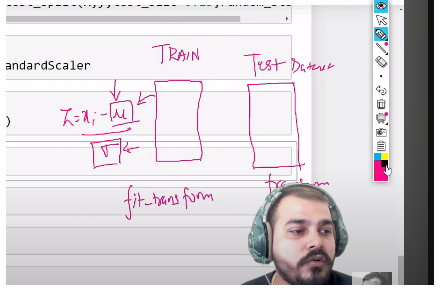

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

**Apply Machine learning algorithm Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("coef is ",regression.coef_)
print("intercept is ",regression.intercept_)

coef is  [17.2982057]
intercept is  156.47058823529412


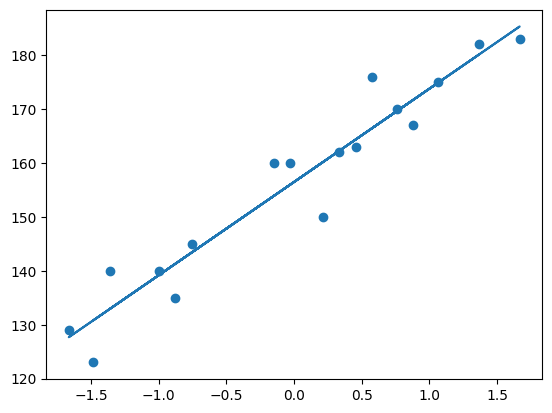

In [ ]:
#plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

# Prediction for test Data


In [ ]:
y_pred=regression.predict(X_test)


**Performance metrics**

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

print(mse)

114.84069295228699


**Prediction for new data**

In [ ]:
regression.predict(scaler.transform([[72]])) #weight is 72 and his height is 155.977

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [1]:
print("emon")

emon
